Import knihoven


In [44]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt


Import souboru se jmeny 

In [45]:
classesfile='coco.names'
classNames=[]
with open(classesfile,'rt') as f:
    classNames=f.read().rstrip('\n').split('\n')

Model

In [46]:
model = YOLO('yolov8n.pt')

Pokud chci hledat urcity objekt zjisti jeho id

In [47]:
searched_object = 'pottedplant'
object_id = classNames.index(searched_object)# zjisti class id objektu co hledam
print(object_id)

58


nacte a zobrazy zvoleny obrazek

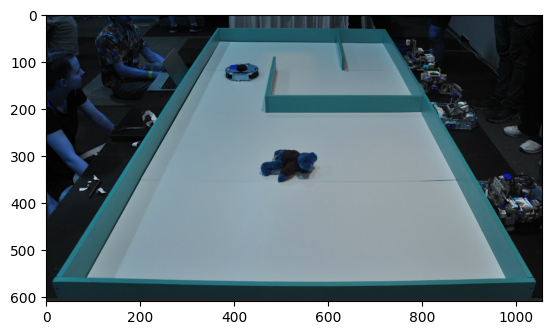

In [48]:
img = cv2.imread('obr1.png')
#cv2.imshow('picture',img)
#cv2.waitKey(2)
plt.imshow(img)

pouziti modelu na nalezeni objektu

In [49]:
results = model(img)



0: 384x640 4 persons, 1 teddy bear, 97.7ms
Speed: 2.1ms preprocess, 97.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


vykresleni jednotlivych objektu na obrazek

In [62]:
n=0
for r in results:
        boxes = r.boxes
        #cv2.line(img,(int(vid_width/2),0),(int(vid_width/2),vid_height),(255,0,255),thickness=2 )#vykresli na video primku stredem videa 
        for box in boxes:
            cls = int(box.cls[0])#zjisti classu objektu
            x1,y1,x2,y2 = box.xyxy [0] #x1 je pozice leveho horniho rohu objektu v ose x, x2 je velikost objektu v ose x v px 
            x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)#prevedeni hodnot na int pro lepsi praci s nima 
            print('X=',x1,'Y=',y1,'W=',x2,'H=',y2)#vypisuje velikost objektu a jeho polohu v px 
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,255),3)#nakresli box okolo detekovane veci 
                #model confidence
            conf = box.conf[0]#jistota modelu 
            conf = float(conf*100)
            rounded_conf = int(conf)#zaokrouhli jistotu modelu na dve desetina mista 
            print('confidence:',rounded_conf)
                #claasnames
            cls = int(box.cls[0])#ulozi classu daneho objektu do promenne 
            print(classNames[cls])#vypise klassu objektu
            if n==0:
                id0=cls
            if n==1:
                id1=cls
            if n==2:
                id2=cls
            if n==3:
                id3=cls
            if n==4:
                id4=cls
            if n==5:
                id5=cls
            if n==6:
                id6=cls
            if n==7:
                id7=cls
            if n==8:
                id8=cls
            if n==9:
                id9=cls
            if n==10:
                id10=cls
                #object center 
            center_x,center_y = x1+(x2/2),y1+(y2/2)#vypocet stredu objektu pro lepsi lokalizaci medveda 
            center_x,center_y = int(center_x-x1/2), int(center_y-y1/2)#prevede hodnoty na int aby se dali pouzit ve funkci ukazujici stred 
            print('center:',center_x,center_y)#vypise udaje 
            cv2.circle(img, (center_x,center_y),10, (255,0,255), thickness=-1)
                #box on bounding box s nazvem claasy a confidence modelu 
            cvzone.putTextRect(img, f'{classNames[cls]}{rounded_conf}',(max(0,x1), max(35,y1)))#vykresli nazev classy objektu spolecne s confidence do videa 
            n=n+1   
            print(n)#optional 
                #vypocet odchylky objektu 
            #object_deviation =0
            #center_line = int(vid_width/2)# x souradnice primky zobrazujici stred 
            #death_zone = 50#ukazuje jak velke rozpeti v px se pocita jako stred 
            #if (center_x > (center_line - death_zone)) and (center_x < (center_line + death_zone)): #pokud je objekt +-50px ve stredu je to brano jako ze je rovne 
             #   object_deviation = 0#odchylka objektu od stredu obrazovky
              #  print('deviation = ',object_deviation)
            #if (center_x < (center_line - death_zone)) and (center_x > (center_line + death_zone)): #pokud je objekt +-50px od stredu zacne se pocitat odchylka -doprava +doleva 
               # object_deviation = center_line-center_x #odchylka objektu od stredu obrazovky
                #print('deviation = ',object_deviation) 
                #prevod odchylky do stupnu 
            #deviation_deg = float(object_deviation/100)
            #print(deviation_deg,"degrees")
            #if (cls > object_id) and (cls < object_id):
             #   print('vrong object')
            #else:
               # print("no objects found turn robot")
print('////////////////////')
print(id0)
print(id1)
print(id2)
print(id3)
print(id4)
print(id5)
print(id6)
print(id7)
print(id8)
print(id9)
print(id10)


X= 103 Y= 1 W= 256 H= 182
confidence: 87
person
center: 179 91
1
X= 0 Y= 85 W= 149 H= 433
confidence: 79
person
center: 74 259
2
X= 934 Y= 1 W= 1055 H= 263
confidence: 66
person
center: 994 132
3
X= 0 Y= 1 W= 69 H= 99
confidence: 53
person
center: 34 50
4
X= 456 Y= 286 W= 582 H= 356
confidence: 51
teddy bear
center: 519 321
5
////////////////////
0
0
0
0
77


NameError: name 'id5' is not defined

ukaze obrazek

tensor([[1.0397e+02, 1.0773e+00, 2.5616e+02, 1.8290e+02, 8.7420e-01, 0.0000e+00],
        [4.6250e-02, 8.5013e+01, 1.4911e+02, 4.3350e+02, 7.9467e-01, 0.0000e+00],
        [9.3420e+02, 1.8362e+00, 1.0555e+03, 2.6379e+02, 6.6804e-01, 0.0000e+00],
        [2.6209e-02, 1.1806e+00, 6.9117e+01, 9.9621e+01, 5.3750e-01, 0.0000e+00],
        [4.5629e+02, 2.8613e+02, 5.8208e+02, 3.5690e+02, 5.1032e-01, 7.7000e+01]])


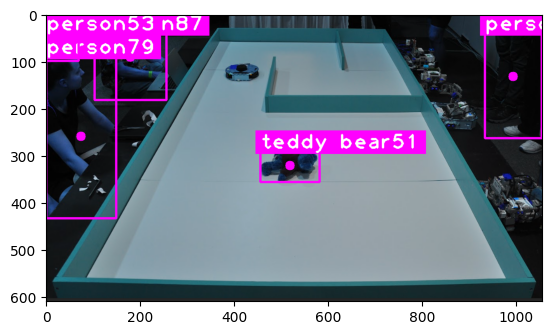

In [56]:
plt.imshow(img)
print(boxes.data)
